# Credit Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

berikut adalah penjelasan dari variabel-variabel yang saya buat dalam kode Python untuk simulasi data perbankan:

umur: Merupakan usia klien dalam tahun. Nilai acak antara 18 hingga 70 tahun.
pendapatan_tahunan: Pendapatan tahunan klien dalam dolar. Nilai acak antara 5,000 hingga 75,000 dolar.

skor_kredit: Skor kredit yang dimiliki klien. Nilai acak antara 300 hingga 850, yang mencerminkan kualitas kredit klien.

jumlah_pinjaman: Jumlah uang yang dipinjam oleh klien dalam dolar. Nilai acak antara 1,000 hingga 50,000 dolar.

durasi_pinjaman_bulan: Durasi pinjaman dalam bulan. Nilai acak antara 12 hingga 60 bulan.

default: Variabel biner yang menunjukkan apakah klien gagal bayar (default) atau tidak. Nilai 0 berarti klien tidak default, dan nilai 1 berarti klien default. Probabilitas default adalah 20%.

In [2]:
# Membuat data acak
np.random.seed(0)
data = {
    'umur': np.random.randint(18, 70, 1000),
    'pendapatan_tahunan': np.random.randint(5000, 75000, 1000),
    'skor_kredit': np.random.randint(300, 850, 1000),
    'jumlah_pinjaman': np.random.randint(1000, 50000, 1000),
    'durasi_pinjaman_bulan': np.random.randint(12, 60, 1000),
    'default': np.random.choice([0, 1], 1000, p=[0.8, 0.2])
}

df = pd.DataFrame(data)
df

,umur,pendapatan_tahunan,skor_kredit,jumlah_pinjaman,durasi_pinjaman_bulan,default
0,62,58478,684,25253,17,0
1,65,50560,301,46314,45,1
2,18,73246,412,46337,43,0
3,21,19591,407,21270,20,0
4,21,28059,449,14701,45,0
...,...,...,...,...,...,...
995,54,26411,311,7955,12,0
996,19,29638,658,15541,16,0
997,47,68294,481,1228,57,1
998,23,70978,596,22708,34,0


In [3]:
df['default'].value_counts()

default
0    832
1    168
Name: count, dtype: int64

In [4]:
# Memisahkan data menjadi fitur dan target
X = df.drop('default', axis=1)
y = df['default']

In [5]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Membuat model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Memprediksi data pengujian
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Pada output, ternyata semua default menunjukkan angka 0 (non-default). Hal ini terjadi karena imbalance Data, dimana Jika data sangat tidak seimbang (misalnya, banyak lebih banyak non-default daripada default), model mungkin cenderung memprediksi nilai mayoritas. Dalam hal ini, teknik seperti oversampling, undersampling, atau penggunaan bobot kelas dapat membantu.

In [7]:
# Menampilkan laporan klasifikasi
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Evaluasi model dengan berbagai threshold

In [8]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

In [9]:
# Asumsikan 'model' adalah model yang telah dilatih dan 'X_test' adalah data pengujian
y_scores = model.predict_proba(X_test)[:, 1]  # Skor probabilitas kelas positif

In [10]:
# Menghitung precision dan recall untuk berbagai ambang batas keputusan
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Mencari ambang batas yang memberikan trade-off terbaik antara precision dan recall
best_threshold = thresholds[np.argmax(precisions + recalls)]

# Menyesuaikan prediksi berdasarkan ambang batas baru
y_pred_adjusted = (y_scores >= best_threshold).astype(int)

print(best_threshold)
print(y_pred_adjusted)

0.08989510883604543
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


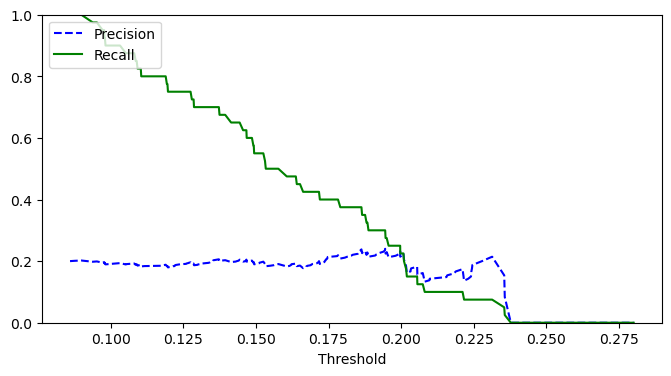

In [11]:
# Visualisasi precision-recall trade-off
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel('Threshold')
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

Langkah selanjutnya adalah:

1. Uji Model dengan Data Terbaru: Jika memungkinkan, uji model dengan set data terbaru atau data ‘out-of-time’ yang tidak digunakan selama proses pelatihan atau validasi untuk melihat bagaimana performanya pada data yang benar-benar baru.
2. Penyesuaian Ambang Batas: Sesuaikan ambang batas keputusan untuk klasifikasi fraud sesuai dengan kebijakan bank dan biaya yang terkait dengan false positives dan false negatives.
3. Integrasi Model ke Sistem Operasional: Integrasikan model SVM ke dalam sistem operasional bank untuk memonitor transaksi secara real-time atau batch, tergantung pada kebutuhan dan infrastruktur bank.
4. Monitoring dan Pembaruan Model: Setelah model diterapkan, monitor performanya secara berkala dan siapkan untuk melakukan pembaruan atau pelatihan ulang model dengan data baru untuk menjaga agar model tetap relevan dan akurat.
5. Model SVM yang telah dilatih dan divalidasi ini akan digunakan untuk memprediksi fraud pada transaksi yang akan datang. Setiap transaksi baru akan diinput ke dalam model sebagai vektor fitur, dan model akan menghasilkan prediksi apakah transaksi tersebut adalah fraud atau bukan. Ini memungkinkan bank untuk secara proaktif mendeteksi dan mencegah kecurangan, sehingga mengurangi risiko kerugian finansial. Penting untuk diingat bahwa model harus diuji dan dipantau secara terus-menerus untuk memastikan bahwa ia tetap efektif seiring berjalannya waktu dan perubahan pola fraud.

In [21]:
# Membuat data acak baru
data_baru = {
    'umur': np.random.randint(18, 70, 1000),
    'pendapatan_tahunan': np.random.randint(5000, 75000, 1000),
    'skor_kredit': np.random.randint(300, 850, 1000),
    'jumlah_pinjaman': np.random.randint(1000, 50000, 1000),
    'durasi_pinjaman_bulan': np.random.randint(12, 60, 1000),
    'default': np.random.choice([0, 1], 1000, p=[0.8, 0.2])
}

# Mengonversi dictionary ke DataFrame
data_frame_baru = pd.DataFrame(data_baru)

# Menampilkan beberapa baris pertama dari data frame baru
print(data_frame_baru.head())

   umur  pendapatan_tahunan  skor_kredit  jumlah_pinjaman  \
0    64               64084          433            15935   
1    67               38522          746            21543   
2    42               49153          378             5720   
3    58               65377          622            21808   
4    69               69814          306            34655   

   durasi_pinjaman_bulan  default  
0                     49        0  
1                     34        1  
2                     27        0  
3                     19        0  
4                     50        0  


In [23]:
X_terbaru = data_frame_baru.drop('default', axis=1)  # asumsikan 'label' adalah kolom target
y_terbaru = data_frame_baru['default']

# Gunakan model yang telah dilatih untuk memprediksi data terbaru
y_pred_terbaru = model.predict(X_terbaru)

# Evaluasi kinerja model pada data terbaru
print(classification_report(y_terbaru, y_pred_terbaru))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       793
           1       0.00      0.00      0.00       207

    accuracy                           0.79      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.79      0.70      1000



C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [24]:
# Ambil probabilitas prediksi dari kelas positif (fraud)
y_scores_terbaru = model.decision_function(X_terbaru)

# Tentukan ambang batas baru
threshold_baru = 0.5  # Sesuaikan nilai ini berdasarkan kebutuhan

# Buat prediksi berdasarkan ambang batas baru
y_pred_adjusted = (y_scores_terbaru >= threshold_baru).astype(int)

# Evaluasi kinerja dengan ambang batas baru
print(classification_report(y_terbaru, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       793
           1       0.00      0.00      0.00       207

    accuracy                           0.79      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.79      0.70      1000



C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [29]:
import joblib as joblib
# Simpan model yang telah dilatih
joblib.dump(model, 'svm_fraud_detection.pkl')

# Di sistem operasional, muat model dan gunakan untuk prediksi real-time atau batch
model_operasional = joblib.load('svm_fraud_detection.pkl')

# Contoh prediksi real-time
# Misalkan 'transaksi_baru' adalah data transaksi yang baru masuk
prediksi_real_time = model_operasional.predict(X_terbaru)

In [32]:
# Monitoring performa model secara berkala
# Misalkan 'monitoring_data' adalah data yang digunakan untuk monitoring
y_pred_monitoring = model_operasional.predict(data_frame_baru.drop('default', axis=1))
print(classification_report(data_frame_baru['default'], y_pred_monitoring))

# Jika performa model menurun, lakukan pelatihan ulang dengan data baru
# Misalkan 'data_pelatihan_baru' adalah data baru untuk pelatihan
model_operasional.fit(data_frame_baru.drop('default', axis=1), data_frame_baru['default'])

# Simpan model yang telah diperbarui
joblib.dump(model_operasional, 'svm_fraud_detection_updated.pkl')

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       793
           1       0.00      0.00      0.00       207

    accuracy                           0.79      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.79      0.70      1000



C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

['svm_fraud_detection_updated.pkl']

# Manajemen Risiko

In [12]:
# Mengatur seed untuk reproducibility
np.random.seed(0)

# Membuat data simulasi portofolio pinjaman
portofolio = pd.DataFrame({
    'Jumlah_Pinjaman': np.random.normal(loc=200000, scale=50000, size=1000).astype(int),
    'Probabilitas_Default': np.random.uniform(low=0.01, high=0.2, size=1000),
    'Loss_Given_Default': np.random.uniform(low=0.4, high=0.6, size=1000)
})
portofolio

,Jumlah_Pinjaman,Probabilitas_Default,Loss_Given_Default
0,288202,0.166162,0.596196
1,220007,0.143100,0.449170
2,248936,0.177785,0.542101
3,312044,0.193649,0.501023
4,293377,0.157202,0.495755
...,...,...,...
995,220643,0.105670,0.511842
996,190080,0.127960,0.536391
997,204709,0.168268,0.432071
998,142619,0.117273,0.592820


In [13]:
# Menghitung eksposur kerugian potensial
portofolio['Eksposur_Kerugian'] = portofolio['Jumlah_Pinjaman'] * portofolio['Probabilitas_Default'] * portofolio['Loss_Given_Default']
portofolio['Eksposur_Kerugian']

0      28550.715676
1      14141.258795
2      23991.779283
3      30275.344499
4      22863.933501
           ...     
995    11933.802711
996    13046.423871
997    14883.076895
998     9915.167982
999     2435.703408
Name: Eksposur_Kerugian, Length: 1000, dtype: float64

In [14]:
# Menghitung VaR dengan confidence interval 95%
VaR_95 = np.percentile(portofolio['Eksposur_Kerugian'], 95)
print(f'Value at Risk (VaR) pada confidence interval 95% adalah: IDR {VaR_95:.2f}')
VaR_95

Value at Risk (VaR) pada confidence interval 95% adalah: IDR 22369.25


22369.246290833165

Interpretasi: Dengan confidence interval 95%, bank dapat yakin bahwa kerugian maksimum yang akan dialami dalam satu hari tidak akan melebihi nilai VaR yang dihitung.

# Deteksi Fraud (Kecurangan)

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
# Mengatur seed untuk reproducibility
np.random.seed(0)

# Membuat data acak untuk simulasi perbankan
data_bank = pd.DataFrame({
    'Umur': np.random.randint(18, 65, size=1000),
    'Pendapatan_Tahunan': np.random.normal(loc=50000, scale=15000, size=1000).astype(int),
    'Skor_Kredit': np.random.randint(300, 850, size=1000),
    'Jumlah_Pinjaman': np.random.normal(loc=200000, scale=50000, size=1000).astype(int),
    'Durasi_Pinjaman_Bulan': np.random.randint(12, 60, size=1000),
    'Jumlah_Transaksi': np.random.randint(0, 100, size=1000),
    'Frekuensi_Transaksi_Bulanan': np.random.randint(0, 20, size=1000)
})
data_bank

,Umur,Pendapatan_Tahunan,Skor_Kredit,Jumlah_Pinjaman,Durasi_Pinjaman_Bulan,Jumlah_Transaksi,Frekuensi_Transaksi_Bulanan
0,62,45555,475,194667,25,38,1
1,18,65804,746,175339,35,36,3
2,21,46425,653,229765,19,7,9
3,21,49113,324,258207,24,14,15
4,57,72423,437,188385,14,37,0
...,...,...,...,...,...,...,...
995,39,27334,752,172115,33,57,11
996,38,54310,526,182331,47,60,4
997,60,61609,550,237147,55,23,2
998,35,15170,605,242199,39,3,9


In [17]:
# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_bank)

Metode yang digunakan adalah model Isolation Forest dengan 100 pohon estimator, tingkat kontaminasi 0.05 (yang merupakan perkiraan proporsi outlier dalam data), dan random_state=0 untuk memastikan hasil yang konsisten setiap kali model dijalankan.

Fungsi fit_predict mengembalikan array yang berisi -1 untuk outlier dan 1 untuk inlier (data normal).

In [18]:
# Deteksi outlier menggunakan Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=0)
outliers = iso_forest.fit_predict(data_scaled)

# Menambahkan kolom 'Outlier' ke data_bank
data_bank['Outlier'] = outliers
data_bank['Outlier']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outlier, Length: 1000, dtype: int32

In [19]:
# Clustering menggunakan KMeans untuk mengidentifikasi pola transaksi
kmeans = KMeans(n_clusters=5, random_state=0)
data_bank['Cluster'] = kmeans.fit_predict(data_scaled)

C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alfar\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [20]:
# Analisis hasil
# Menghitung jumlah outlier yang terdeteksi
jumlah_outlier = (data_bank['Outlier'] == -1).sum()
print(f'Jumlah outlier yang terdeteksi: {jumlah_outlier}')

# Menganalisis cluster untuk pola transaksi yang mencurigakan
for i in range(5):
    cluster_size = (data_bank['Cluster'] == i).sum()
    cluster_outliers = data_bank[(data_bank['Cluster'] == i) & (data_bank['Outlier'] == -1)]
    print(f'Cluster {i}: Ukuran Cluster = {cluster_size}, Jumlah Outlier = {len(cluster_outliers)}')

Jumlah outlier yang terdeteksi: 50
Cluster 0: Ukuran Cluster = 200, Jumlah Outlier = 11
Cluster 1: Ukuran Cluster = 186, Jumlah Outlier = 8
Cluster 2: Ukuran Cluster = 206, Jumlah Outlier = 14
Cluster 3: Ukuran Cluster = 194, Jumlah Outlier = 7
Cluster 4: Ukuran Cluster = 214, Jumlah Outlier = 10


Dari informasi ini, kita dapat melihat bahwa outlier tersebar di seluruh klaster, yang menunjukkan bahwa transaksi yang mencurigakan tidak terbatas pada satu segmen atau pola transaksi tertentu. Ini menegaskan pentingnya analisis klaster dalam deteksi fraud karena memberikan wawasan tambahan tentang bagaimana transaksi mencurigakan tersebut terdistribusi di seluruh data.

Selain itu, klaster dengan jumlah outlier yang lebih tinggi, seperti Cluster 2, mungkin memerlukan penyelidikan lebih lanjut untuk memahami mengapa klaster tersebut memiliki proporsi outlier yang lebih besar. Ini bisa jadi karena karakteristik tertentu dari transaksi dalam klaster tersebut atau indikasi adanya skema fraud yang lebih kompleks.